# Deep Learning: Building Intuition, Part III

In this post, I use a neural network to approximate a simple nonlinear function, and I will investigate how changing the learning rate helps in learning the function representation.

<!-- TEASER_END -->

This is part of a series. Here is a link to [Part I](link://slug/deep-learning-building-intuition-part-i) and [Part II](link://slug/deep-learning-building-intuition-part-ii).

Last time, the model was changed to add more layers and this (surprisingly, to me) did not help model performance. Here the learning rate will be explored on a two layer network.

On to the code. Here are the required libraries.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import Constant

Using TensorFlow backend.


And as before, here is the simulated data.

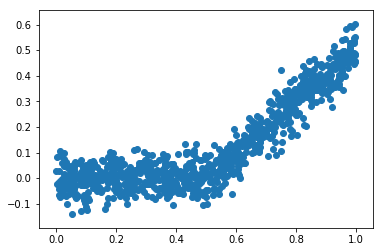

In [2]:
N = 1000       # number of data points to create
scale = 0.05   # standard deviation of the noise to add

X = np.random.uniform(size=N)
Y = np.maximum(0,X-0.5) + np.random.normal(scale=scale, size=N)
X = X.reshape((N,1))
Y = Y.reshape((N,1))
x_train, y_train = X[:(N//10)*9,:], Y[:(N//10)*9,:]
x_test, y_test = X[(N//10)*9:,:], Y[(N//10)*9:,:]

_ = plt.scatter(x_train, y_train)

## Model creation with different learning rates

The `create_model` function will create a model with two hidden layers with the ability to change the learning rate. The default here is what `keras` uses for the default `SGD` learning rate.

MSE: 0.02951
CPU times: user 1.03 s, sys: 44 ms, total: 1.08 s
Wall time: 1 s


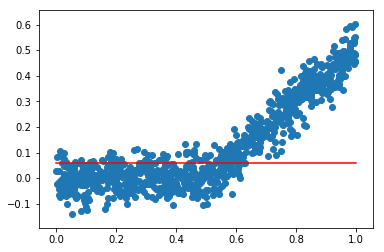

In [3]:
%%time

def create_model(num_neurons=10, lr=0.01, epochs=1):
    """Create a simple network with one hidden layer

    num_neurons: Number of neurons per layer.
    lr:          Learning rate.
    epochs:      Number of epochs for training.
    """
    
    model = Sequential()

    # The first hidden layer is a bit special, we have to specify the input_dim
    model.add(Dense(num_neurons, input_dim=1, activation="relu", kernel_initializer="normal"))

    # Add another layer for a network with two hidden layers
    model.add(Dense(num_neurons, activation="relu", kernel_initializer="normal"))
    
    # Output layer
    model.add(Dense(1, activation="linear", kernel_initializer="normal"))

    # Use 'SGD' class to pass the learning rate
    optimizer = SGD(lr=lr)
    
    model.compile(loss="mse", optimizer=optimizer)

    # Fit on training data, evaluate on test data
    fit = model.fit(x_train, y_train, epochs=epochs, verbose=False)
    score = model.evaluate(x_test, y_test, verbose=False)

    # See model predictions and MSE
    x_pred = np.linspace(0,1,100)
    y_pred = model.predict(x_pred)

    print("MSE: {:.4}".format(score))

    # Plot the data and predictions
    plt.scatter(x_train, y_train)
    plt.plot(x_pred, y_pred, color="red")


# Model with single neuron in the hidden layer
create_model(num_neurons=1)

Again, this looks very similar to the previous posts' first model, mostly because it is almost the same model (this has an extra hidden layer).

## Model performance with different learning rates

Using a learning rate that is way too big will result in a model that diverges (MSE increases). For this case, a learning rate of 1 is too big. The below will use a learning rate of 0.1, 0.01, and 0.001 to compare. To keep everything else constant, the number of neurons in the two layers is 10 each and the number of epochs is 100.

MSE: 0.02577
CPU times: user 10.1 s, sys: 1.29 s, total: 11.4 s
Wall time: 5.87 s


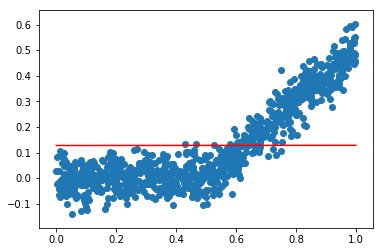

In [4]:
%%time
create_model(num_neurons=10, lr=0.001, epochs=100)

MSE: 0.02579
CPU times: user 10.2 s, sys: 1.47 s, total: 11.7 s
Wall time: 5.92 s


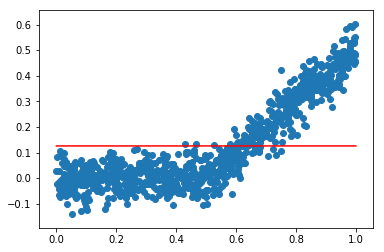

In [5]:
%%time
create_model(num_neurons=10, lr=0.01, epochs=100)

MSE: 0.003897
CPU times: user 10.6 s, sys: 1.38 s, total: 12 s
Wall time: 5.92 s


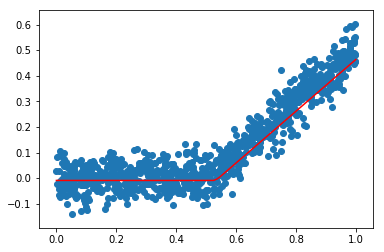

In [6]:
%%time
create_model(num_neurons=10, lr=0.1, epochs=100)

And finally something that looks reasonable. Just for fun, here is what using a learning rate of 1 looks like.

MSE: 2.333
CPU times: user 10.4 s, sys: 1.66 s, total: 12.1 s
Wall time: 6.25 s


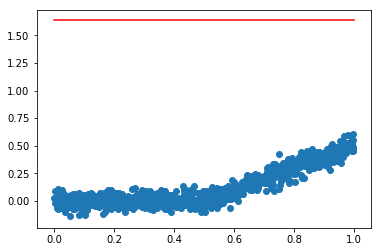

In [8]:
%%time
create_model(num_neurons=10, lr=1, epochs=100)

Totally off and diverging.

## Conclusion

The learning rate is important. In the previous posts, using the default learning rate of 0.01 was most likely too small. The model trains much faster accurately with a higher learning rate on this data.